## Code used for Taylor et al. (2024)
### Chapter 6
### 'Confined overbank development: Controls on sediment accumulation and distribution in tectonically active slope settings'


Bed proportion data stripped from logs using 'striplog', where resolution and outcrop quality allowed the differentiation of bed types 
 


In [2]:
import striplog
import os 
from striplog import Striplog
import numpy as np
import IPython 
from IPython.display import Image
from striplog import Legend
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import matplotlib.patches as mpatches
import seaborn as sns


Import images of bed types assigned to logs

In [3]:
img1 = Image("data\pbbl1_0_75.png", width= 20)
img2 = Image("data\pbbl2_0_235.png", width= 20)
img3 = Image("data\pbms1_0_480.png", width= 20)
img4 = Image("data\pbms2_0_670.png", width= 20)
img5 = Image("data\pbms3_0_720.png", width= 20)
img6 = Image("data\pbo2a_0_480.png", width= 20)
img7 = Image("data\pbo2b_0_193.png", width= 20)
img8 = Image("data\pbo2c_0_240.png", width= 20)
img9 = Image("data\pbo2d_0_240.png", width= 20)
img10 = Image("data\pbon1_0_287.png", width= 20)
img11 = Image("data\pbon2_0_164.png", width= 20)
img12 = Image("data\pbon3_0_239.png", width= 20)
img13 = Image("data\pbon4_0_570.png", width= 20)
img14 = Image("data\pb2a_0_165.png", width= 20)
img15 = Image("data\pb2b_0_158.png", width= 20)
img16 = Image("data\pb2c_0_115.png", width= 20)
img17 = Image("data\pb2d_0_132.png", width= 20)
img18 = Image("data\pb4a_0_106.png", width= 20)
img19 = Image("data\pb4b_0_54.png", width= 20)
img20 = Image("data\pbs1_0_14.png", width= 20)
img21 = Image("data\pbs2_0_14.png", width= 20)


Create "Legend" of bed types

In [14]:
legend_csv = """colour, width, component lithology
#9E0142, 2, B1: Structureless beds
#D53E4F, 2, B2: Planar/wavy laminated beds
#F46D43, 2, B3: Ripple cross-laminated beds
#FDAE61, 2, B4: Pinch and swell rounded beds
#FEE08B, 2, B5: Hummock-like bedforms 
#FFFFBF, 2, B6: Mudclast-rich dune-scale bedforms 
#E6F598, 2, B7: Banded beds
#ABDDA4, 1, B8: Rotated beds
#66C2A5, 1, B9: Folded beds
#3288BD, 1, B10: Debritic beds
#5E4FA2, 1, B11: Mudstone beds 

"""

In [15]:
legend = Legend.from_csv(text=legend_csv)

In [16]:
legend[:12]

Legend(Decor({'_colour': '#9e0142', 'width': 2.0, 'component': Component({'lithology': 'b1: structureless beds'}), 'hatch': None})
Decor({'_colour': '#d53e4f', 'width': 2.0, 'component': Component({'lithology': 'b2: planar/wavy laminated beds'}), 'hatch': None})
Decor({'_colour': '#f46d43', 'width': 2.0, 'component': Component({'lithology': 'b3: ripple cross-laminated beds'}), 'hatch': None})
Decor({'_colour': '#fdae61', 'width': 2.0, 'component': Component({'lithology': 'b4: pinch and swell rounded beds'}), 'hatch': None})
Decor({'_colour': '#fee08b', 'width': 2.0, 'component': Component({'lithology': 'b5: hummock-like bedforms '}), 'hatch': None})
Decor({'_colour': '#ffffbf', 'width': 2.0, 'component': Component({'lithology': 'b6: mudclast-rich dune-scale bedforms '}), 'hatch': None})
Decor({'_colour': '#e6f598', 'width': 2.0, 'component': Component({'lithology': 'b7: banded beds'}), 'hatch': None})
Decor({'_colour': '#abdda4', 'width': 1.0, 'component': Component({'lithology': 'b8: rotated beds'}), 'hatch': None})
Decor({'_colour': '#66c2a5', 'width': 1.0, 'component': Component({'lithology': 'b9: folded beds'}), 'hatch': None})
Decor({'_colour': '#3288bd', 'width': 1.0, 'component': Component({'lithology': 'b10: debritic beds'}), 'hatch': None})
Decor({'_colour': '#5e4fa2', 'width': 1.0, 'component': Component({'lithology': 'b11: mudstone beds '}), 'hatch': None}))

'strip' data from log images 

In [18]:

L0 = Striplog.from_image("data\L0_0_19.png", start=0, stop=19, col_offset=0.2, legend=legend, tolerance=85, background='fffff')
L1 = Striplog.from_image("data\L1_0_32.60.png", start=0, stop=32.60, col_offset=0.2, legend=legend, tolerance=85, background='fffff')
L2 = Striplog.from_image("data\L2_0_43.75.png", start=0, stop=43.75, col_offset=0.2, legend=legend, tolerance=85, background='fffff')
L3 = Striplog.from_image("data\L3_0_31.60.png", start=0, stop=31.60, col_offset=0.2, legend=legend, tolerance=85, background='fffff')
M1 = Striplog.from_image("data\M1_0_16.png", start=0, stop=16, col_offset=0.2, legend=legend, tolerance=85, background='fffff')
M1b = Striplog.from_image("data\M1b_0_6.9.png", start=0, stop=6.9, col_offset=0.2, legend=legend, tolerance=85, background='fffff')
M1c = Striplog.from_image("data\M1c_0_29.1.png", start=0, stop=29.1, col_offset=0.2, legend=legend, tolerance=85, background='fffff')
M2 = Striplog.from_image("data\M2_0_11.36.png", start=0, stop=11.36, col_offset=0.2, legend=legend, tolerance=85, background='fffff')
M3 = Striplog.from_image("data\M3_0_15.85.png", start=0, stop=15.85, col_offset=0.2, legend=legend, tolerance=85, background='fffff')
M4 = Striplog.from_image("data\M4_0_16.png", start=0, stop=16, col_offset=0.2, legend=legend, tolerance=85, background='fffff')
M4b = Striplog.from_image("data\M4b_0_4.png", start=0, stop=4, col_offset=0.2, legend=legend, tolerance=85, background='fffff')
O1 = Striplog.from_image("data\O1_0_35.png", start=0, stop=35, col_offset=0.2, legend=legend, tolerance=85, background='fffff')
O2 = Striplog.from_image("data\O2_0_13.66.png", start=0, stop=13.66, col_offset=0.2, legend=legend, tolerance=85, background='fffff')
O2b = Striplog.from_image("data\O2b_0_49.6.png", start=0, stop=49.6, col_offset=0.2, legend=legend, tolerance=85, background='fffff')
O3 = Striplog.from_image("data\O3_0_6.png", start=0, stop=6, col_offset=0.2, legend=legend, tolerance=85, background='fffff')
O4 = Striplog.from_image("data\O4_0_9.7.png", start=0, stop=9.7, col_offset=0.2, legend=legend, tolerance=85, background='fffff')
O4b = Striplog.from_image("data\O4b_0_11.3.png", start=0, stop=11.3, col_offset=0.2, legend=legend, tolerance=85, background='fffff')
O5 = Striplog.from_image("data\O5_0_15.80.png", start=0, stop=15.80, col_offset=0.2, legend=legend, tolerance=85, background='fffff')



Plot strip logs and total thickness of each bed type

([11.407053858520898,
  1.694784967845664,
  1.4923633440514483,
  0.6302853697749167,
  0.3159364951768491,
  0.25957596463022536],
 (Component({'lithology': 'b11: mudstone beds '}),
  Component({'lithology': 'b1: structureless beds'}),
  Component({'lithology': 'b3: ripple cross-laminated beds'}),
  Component({'lithology': 'b2: planar/wavy laminated beds'}),
  Component({'lithology': 'b7: banded beds'}),
  Component({'lithology': 'b4: pinch and swell rounded beds'})),
 <BarContainer object of 6 artists>)

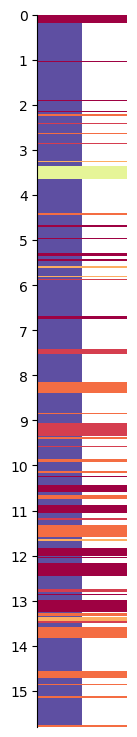

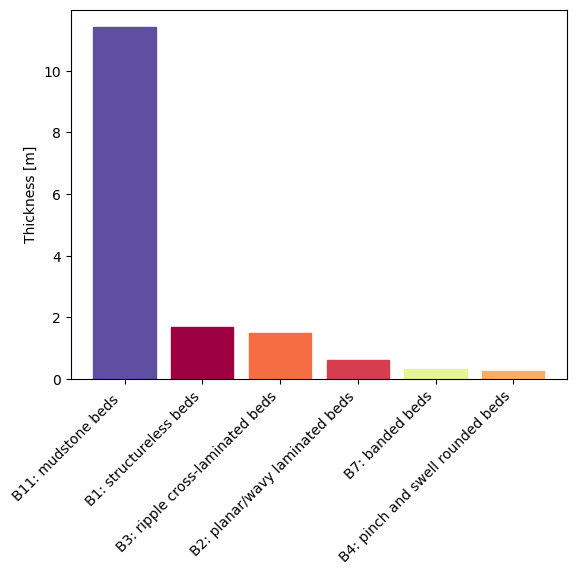

In [38]:
O5.plot(lw=0, ladder=True, label='hello', legend=legend, aspect=5, ticks=1)
O5.histogram(legend=legend, rotation=45, ha='right')
